**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix , classification_report , ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
import warnings as wr
wr.filterwarnings("ignore")

**Importing the Dataset**

In [2]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Exploratory Data Analysis**

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

**Outliers**

<Axes: >

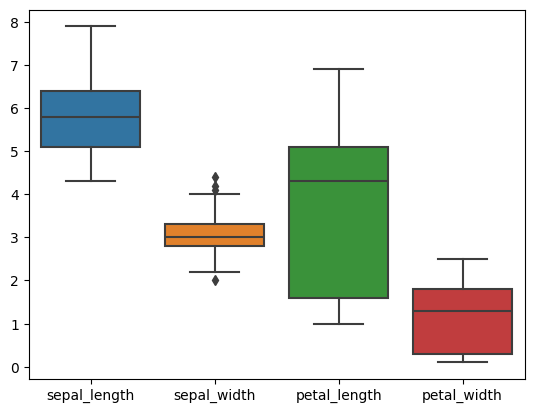

In [10]:
sns.boxplot(data = df)

**Normal Dist identify**

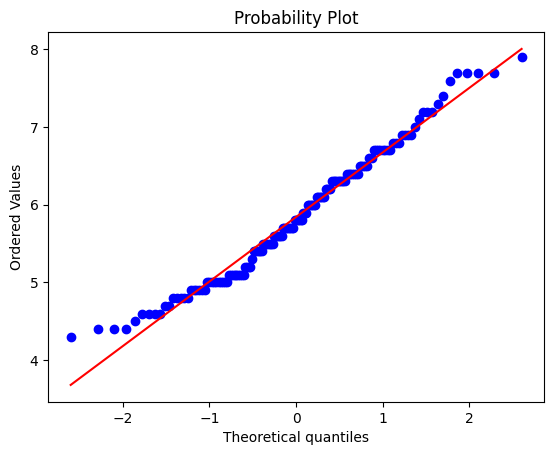

In [11]:
st.probplot(df['sepal_length'] , plot=plt)
plt.show()

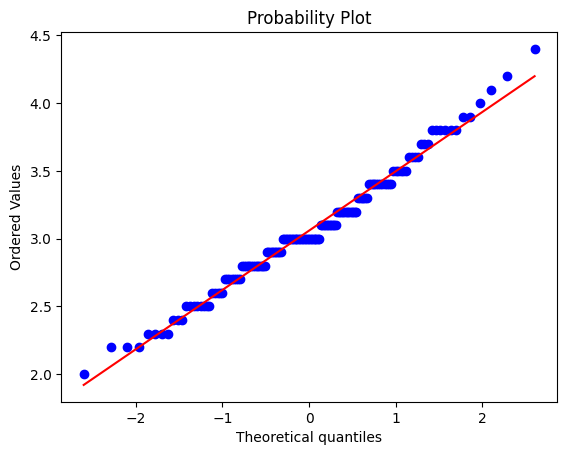

In [12]:
st.probplot(df['sepal_width'] , plot=plt)
plt.show()

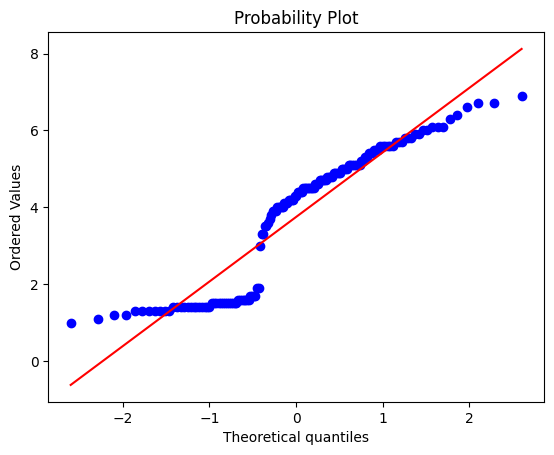

In [13]:
st.probplot(df['petal_length'] , plot=plt)
plt.show()

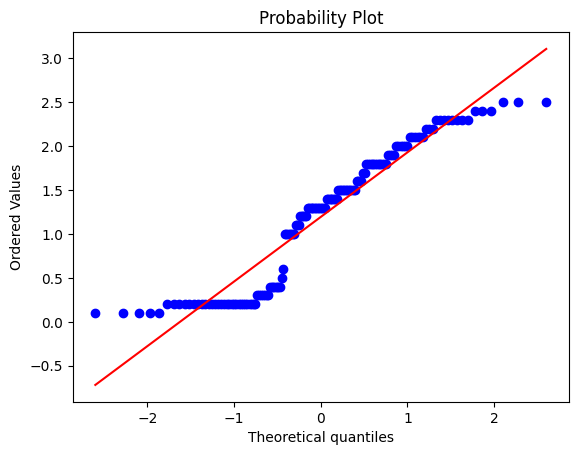

In [14]:
st.probplot(df['petal_width'] , plot=plt)
plt.show()

**Split the data**

In [15]:
X = df.drop('species' , axis=1)
y = df['species']

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=13)

**Transformation**

In [17]:
X_train['petal_width'] = np.square(X_train['petal_width'])
X_train['petal_length'] = np.square(X_train['petal_length'])
X_test['petal_width'] = np.square(X_test['petal_width'])
X_test['petal_length'] = np.square(X_test['petal_length'])

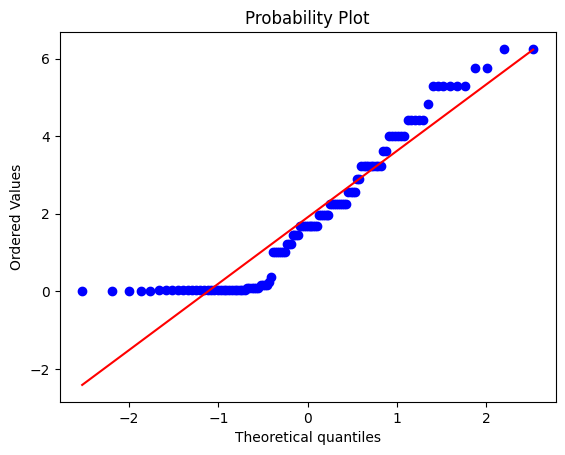

In [18]:
st.probplot(X_train['petal_width'] , plot=plt)
plt.show()

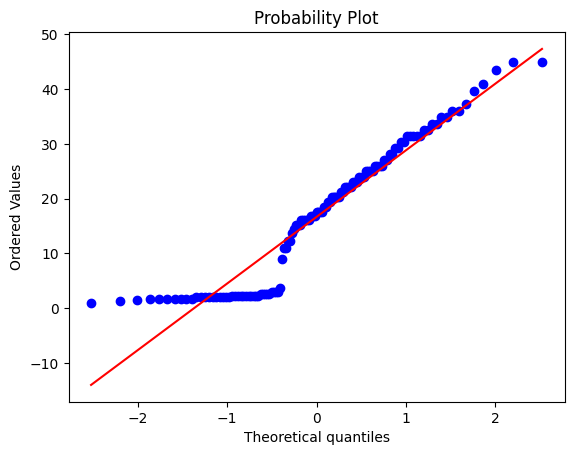

In [19]:
st.probplot(X_train['petal_length'] , plot=plt)
plt.show()

**Model**

In [20]:
gnb = GaussianNB()

In [21]:
gnb.fit(X_train , y_train)

GaussianNB()

In [22]:
y_predict = gnb.predict(X_test)
y_predict

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica'],
      dtype='<U10')

**Evaluation**

In [23]:
confusion_matrix(y_test , y_predict)

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

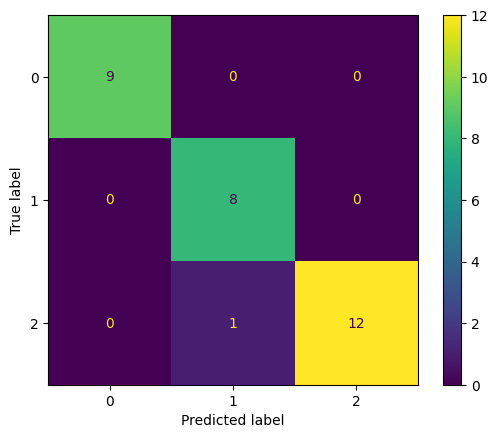

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test , y_predict)).plot()

In [26]:
accuracy_score(y_test , y_predict)

0.9666666666666667

In [27]:
precision_score(y_test , y_predict , average='weighted')

0.9703703703703703